<a href="https://colab.research.google.com/github/amitkhamkar22/Learning/blob/main/CNN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Import dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#Convolutional Neural Network

####Load dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("x_train_shape", x_train.shape, "x_test_shape", x_test.shape)
print("y_train_shape", y_train.shape, "y_test_shape", y_test.shape)

x_train_shape (50000, 32, 32, 3) x_test_shape (10000, 32, 32, 3)
y_train_shape (50000, 1) y_test_shape (10000, 1)


Text(0.5, 1.0, '[2]')

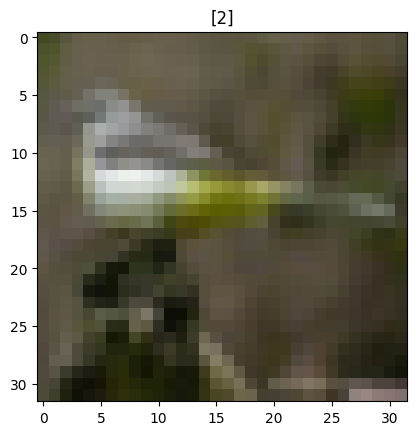

In [ ]:
#input image number 'i'
i = 57
plt.imshow(x_train[i])
plt.title(y_train[i])

####Data normalization

In [ ]:
x_train = x_train.astype ("float32")/255
x_test = x_test.astype ("float32")/255

##Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape = (32,32,3)),
        layers.Conv2D(32, 3, padding = 'valid', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(64, 3, padding = 'valid', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(128, 3, activation = 'relu'),
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10)
    ]
)

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)             

#Compile

In [ ]:
from keras.engine.training import optimizer
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]

)

#Model fit

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose= 2)
model.evaluate(x_test, y_test, batch_size=64, verbose= 2)

Epoch 1/10
782/782 - 67s - loss: 1.5434 - accuracy: 0.4367 - 67s/epoch - 85ms/step
Epoch 2/10
782/782 - 67s - loss: 1.1555 - accuracy: 0.5904 - 67s/epoch - 85ms/step
Epoch 3/10
782/782 - 65s - loss: 0.9923 - accuracy: 0.6509 - 65s/epoch - 83ms/step
Epoch 4/10
782/782 - 65s - loss: 0.8798 - accuracy: 0.6939 - 65s/epoch - 83ms/step
Epoch 5/10
782/782 - 65s - loss: 0.7958 - accuracy: 0.7234 - 65s/epoch - 82ms/step
Epoch 6/10
782/782 - 65s - loss: 0.7189 - accuracy: 0.7509 - 65s/epoch - 83ms/step
Epoch 7/10
782/782 - 65s - loss: 0.6588 - accuracy: 0.7685 - 65s/epoch - 83ms/step
Epoch 8/10
782/782 - 65s - loss: 0.6079 - accuracy: 0.7856 - 65s/epoch - 83ms/step
Epoch 9/10
782/782 - 64s - loss: 0.5500 - accuracy: 0.8081 - 64s/epoch - 82ms/step
Epoch 10/10
782/782 - 64s - loss: 0.5050 - accuracy: 0.8226 - 64s/epoch - 82ms/step
157/157 - 3s - loss: 0.8608 - accuracy: 0.7210 - 3s/epoch - 22ms/step


[0.8608159422874451, 0.7210000157356262]

#model as a function

In [ ]:
 from keras.layers import Flatten

def my_model():
  inputs = keras.Input(shape = (32,32,3))
  x = layers.Conv2D(32, 3)(inputs)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D()(x) #default 2x2
  x = layers.Conv2D(64, 5, padding ='same')(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Conv2D(128, 3)(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation = 'relu')(x)
  outputs = layers.Dense(10)(x)
  model_1 = keras.Model(inputs = inputs, outputs = outputs)
  return model_1


In [ ]:
model_2 = my_model()

In [ ]:
model_2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]

)

In [ ]:
model_2.fit(x_train, y_train, batch_size=64, epochs=10, verbose= 2)
model_2.evaluate(x_test, y_test, batch_size=64, verbose= 2)

Epoch 1/10
782/782 - 254s - loss: 1.7483 - accuracy: 0.3596 - 254s/epoch - 324ms/step
Epoch 2/10
782/782 - 251s - loss: 1.2319 - accuracy: 0.5309 - 251s/epoch - 321ms/step
Epoch 3/10
782/782 - 251s - loss: 1.0482 - accuracy: 0.6073 - 251s/epoch - 321ms/step
Epoch 4/10
782/782 - 251s - loss: 0.9340 - accuracy: 0.6509 - 251s/epoch - 321ms/step
Epoch 5/10
782/782 - 250s - loss: 0.8455 - accuracy: 0.6858 - 250s/epoch - 320ms/step
Epoch 6/10
782/782 - 251s - loss: 0.7811 - accuracy: 0.7117 - 251s/epoch - 321ms/step
Epoch 7/10
782/782 - 251s - loss: 0.7064 - accuracy: 0.7408 - 251s/epoch - 321ms/step
Epoch 8/10
782/782 - 251s - loss: 0.6454 - accuracy: 0.7624 - 251s/epoch - 321ms/step
Epoch 9/10
782/782 - 250s - loss: 0.5843 - accuracy: 0.7851 - 250s/epoch - 319ms/step
Epoch 10/10
782/782 - 251s - loss: 0.5355 - accuracy: 0.8037 - 251s/epoch - 321ms/step
157/157 - 12s - loss: 1.1090 - accuracy: 0.6559 - 12s/epoch - 79ms/step


[1.1089601516723633, 0.6559000015258789]